# Linear Regression to Predict Housing Prices

Machine Learning on Coursera week 1 exercise includes linear regression to predict housing prices. The data contains the size and number of bedrooms in a house, and the price for that house. Our goal is to use this data so that given the size and number of bedrooms, we are able to predict the price of the house.
## Part 1: Getting the Data

In [4]:
import matplotlib.pyplot as plt
import numpy as np

path = '/Users/archit-p/sources/coursera/machine-learning/machine-learning-ex1/ex1/ex1data2.txt'

In [5]:
f = open(path, 'r')

dataset = []

for line in f:
    fields = line.strip().split(',')
    fields[0] = float(fields[0])
    fields[1] = float(fields[1])
    fields[2] = float(fields[2])
    dataset.append(fields)

In [6]:
dataset[0:5]

[[2104.0, 3.0, 399900.0],
 [1600.0, 3.0, 329900.0],
 [2400.0, 3.0, 369000.0],
 [1416.0, 2.0, 232000.0],
 [3000.0, 4.0, 539900.0]]

In order to make gradient descent converge faster, we normalize the data. To normalize the data, we subtract the mean and divide by the standard deviation. This gives values roughly in the range of `[-1, +1]`.

In [7]:
# number of features
n = 2

# number of datapoints
m = len(dataset)

x = np.ones(shape=(m, n + 1))
y = np.zeros(m)

for i, d in enumerate(dataset):
    for j in range(n):
        x[i][1 + j] = dataset[i][j]
        y[i] = dataset[i][-1]

# normalization        
for j in range(n):
    x[:, 1 + j] = (x[:, 1 + j] - np.ones(m) * x[:, 1 + j].mean()) / x[:, 1 + j].std()

In [8]:
x[0:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [9]:
y[0:5]

array([399900., 329900., 369000., 232000., 539900.])

To visualize the data, we plot a 3-dimensional scatter plot.

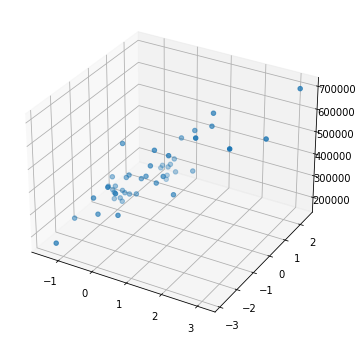

In [10]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')

ax.scatter(x[:, 1], x[:, 2], y)
plt.show()

## Part 2: Regression and Gradient Descent
In Part 2, we define the hypothesis, error and gradient functions and perform the minimization.

In [11]:
def hypothesis(theta, xi):
    return np.matmul(np.transpose(theta), xi)

In [12]:
def mse(theta):
    sum = 0
    predictions = np.zeros(m)
    for i, xi in enumerate(x):
        predictions[i] = hypothesis(theta, xi)
    return ((predictions - y) ** 2).mean() / 2;

In [13]:
mse(np.zeros(n + 1))

65591548106.45744

In [14]:
def derivative(theta, j):
    sum = 0
    for xi, yi in zip(x, y):
        sum += (hypothesis(theta, xi) - yi) * xi[j]
    return sum / m

In [15]:
derivative(np.zeros(n + 1), 0)

-340412.6595744681

To minimize the error, we use gradient descent with a learning rate of 0.02.

In [14]:
%%time
theta = np.zeros(n + 1)
iterations = 2000
alpha = 0.02

h = np.zeros(iterations)

for i in range(iterations):
    newtheta = np.zeros(n + 1)
    for j in range(n + 1):
        newtheta[j] = theta[j] - alpha * derivative(theta, j)
    theta = newtheta
    h[i] = mse(theta)

print(theta)

[340412.65957447 109447.79525195  -6578.35363647]
CPU times: user 1.12 s, sys: 7.42 ms, total: 1.12 s
Wall time: 1.13 s


In order to check whether gradient descent is converging and we have made a correct choice of alpha. We plot the error values vs the number of iterations. In an ideal scenario this value should decrease and converge to zero with the number of iterations.

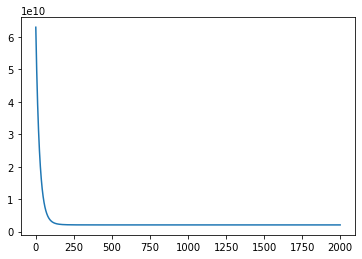

In [15]:
plt.plot(h)
plt.show()